In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, MultiModeSystem, plot_full_evolution, Decay
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

We fit a decaying sinusoid of the form: $ a e^{- (\lambda/2) t} \cos(\omega t + \phi_0)$

In [7]:
# params directly provided

omega_0 = 2*np.pi*1
omega_range = 2*np.pi*np.linspace(0.5,1.5,101)
omegas = [omega_0] + list(omega_range)

num_modes = len(omegas)
kappas = np.zeros(num_modes)
gammas = np.zeros(num_modes)
kerrs = np.zeros(num_modes)

couplings = []
coupling_strength = .1
for i in range(1, num_modes):
    couplings.append([0,i,2*np.pi*coupling_strength])
    

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs": kerrs, "couplings":couplings})

x_0 = np.zeros(num_modes*2)
x_0[0] = 100 # num of photons initially 

ts = np.linspace(0, 20, 10001)
X = sys.trapezoidal(x_0, ts)

(204, 10001)


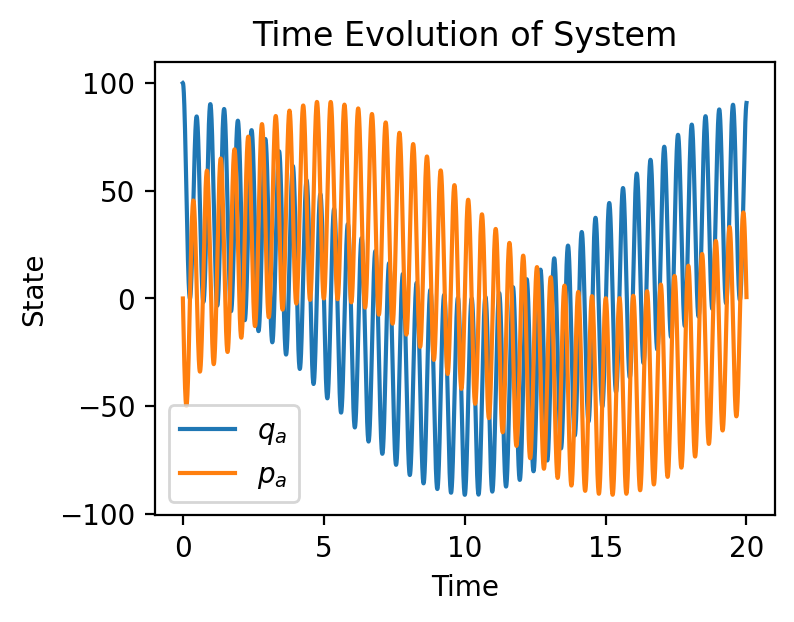

In [8]:
print(X.shape)
fig, ax = plot_full_evolution(X[:2], ts, labels=["$q_a$","$p_a$"])
# plot_full_evolution([np.sqrt(X[0,:]**2+X[1,:]**2)], ts, labels=["sqrt($q_a^2 + p_a^2$)"], fig=fig, ax=ax)
ax.legend()